# Data Visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In [1]:
# import necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
# import modified data set

df_wine = pd.read_csv("winequality_modified.csv")

In [3]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,fixed_acidity_level,volatile_acidity_level,citric_acid_level,residual_sugar_level,chlorides_level,free_sulfur_dioxide_level,total_sulfur_dioxide_level,density_level,pH_level,sulphates_level,alcohol_level
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,high,high,low,medium,high,medium,low,high,mod_high,high,medium
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,high,high,low,medium,high,low,low,high,medium,high,medium
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high,medium,high,medium,high,medium,low,high,mod_high,mod_high,medium
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,mod_high,high,low,medium,high,low,low,high,low,mod_high,low
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,mod_high,high,low,low,high,low,low,high,low,mod_high,low


## Average quality score by wine color.

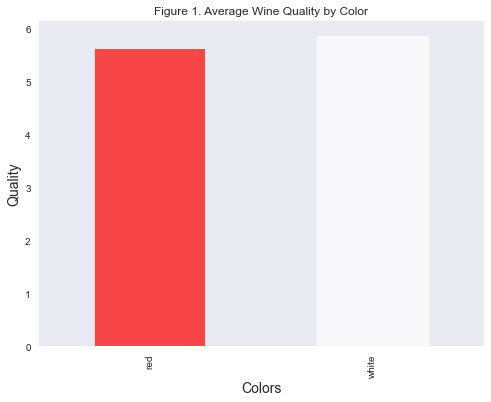

In [4]:
colors = ['red', 'white']
sns.set_style('dark')
color_mean = df_wine.groupby('color').quality.mean()
color_mean.plot(kind='bar', title="Figure 1. Average Wine Quality by Color", color=colors, alpha = 0.7, figsize=(8,6));
plt.xlabel('Colors', fontsize=14);
plt.ylabel('Quality', fontsize=14);

In [5]:
df_wine.groupby('color').quality.mean()

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

* Thus the mean rating of white wine is rather greater than rating of red wine. Average rating of __red wine is 5.62__ whereas __white wine is 5.85__.

## How is red and white wine's data distributed  ?

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [6]:
# get counts for each rating and color and get total counts for each color

color_counts = df_wine.groupby(['color', 'quality']).count()['pH']
color_totals = df_wine.groupby('color').count()['pH']

In [7]:
# get proportions by dividing counts for each quality rating / total counts for each color

red_proportion = color_counts['red'] / color_totals['red']
white_proportion = color_counts['white'] / color_totals['white']

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [10]:
ind = np.arange(len(red_proportion))  # the x locations for the groups
width = 0.35       # the width of the bars

ValueError: shape mismatch: objects cannot be broadcast to a single shape

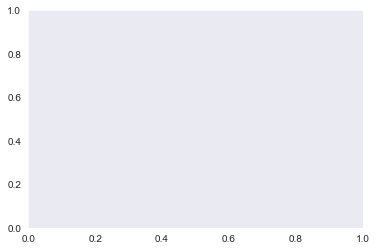

In [13]:
# plot bars
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportion, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

In [12]:
red_proportion['9'] = 0

## Relationship of various factors with with Quality

In [ ]:
# Scatter Plots

for col in df_wine.columns[:12]:
    if col == 'quality':
        pass
    else:
        plt.figure()
        sns.scatterplot(x=col, y='quality', data=df_wine)

In [ ]:
for col in df_wine.columns[:11]:
    plt.figure()
    sns.scatterplot(y='quality', x=col, data=df_wine);



* Understanding the scatter plots, we interpret that quality has a relationship with amount of alcohol and pH (acidity) of the respective wines, because the plots are more precise and have a positive relation.